# Task 2

# creating database connection

In [ ]:
# Attempting to create all tables in an SQLite database using Python's sqlite3 module

# Re-importing necessary libraries in case the environment has reset
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime, timedelta

# Establishing a new SQLite database connection in memory
#conn = sqlite3.connect(':memory:')
conn = sqlite3.connect('insurances.db')

# creating table structure

In [ ]:
# Creating SQL statements for each table
tables_creation_sql = [
    '''
    CREATE TABLE Customers (
        CustomerID INTEGER PRIMARY KEY,
        Name TEXT,
        Age INTEGER,
        City TEXT,
        Country TEXT,
        LoginDevices TEXT,
        SignupDate DATE,
        IsActive BOOLEAN,
        IsAppInstalled BOOLEAN
    );
    ''',
    '''
    CREATE TABLE Policies (
        PolicyID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        DateIssued DATE,
        DateActivated DATE,
        DateCancelled DATE,
        Premium REAL,
        CoverageAmount REAL,
        IsActive BOOLEAN,
        IsUsed BOOLEAN,
        NoOfTimesUsed INTEGER,
        LastRenewalDate DATE,
        RenewalCount INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
    );
    ''',
    '''
    CREATE TABLE Interactions (
        InteractionID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        ChannelUsed TEXT,
        InteractionDate DATE,
        InteractionType TEXT,
        IssueResolved BOOLEAN,
        SatisfactionScore INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
    );
    ''',
    '''
    CREATE TABLE SalesTransactions (
        TransactionID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        DateOfTransaction DATE,
        Amount REAL,
        IsWithInsurance BOOLEAN,
        Platform TEXT,
        Device TEXT,
        ProductID INTEGER,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID),
        FOREIGN KEY (ProductID) REFERENCES Products(ProductID)
    );
    ''',
    '''
    CREATE TABLE Products (
        ProductID INTEGER PRIMARY KEY,
        ProductType TEXT,
        InsuranceOffered BOOLEAN,
        YearOfService INTEGER
    );
    ''',
    '''
    CREATE TABLE TechnicalIssues (
        IssueID INTEGER PRIMARY KEY,
        DateReported DATE,
        SystemComponent TEXT,
        Severity INTEGER,
        IsResolved BOOLEAN,
        ResolutionTime INTEGER
    );
    ''',
    '''
    CREATE TABLE FinancialMetricsCustomer (
        FinancialID INTEGER PRIMARY KEY,
        CustomerID INTEGER,
        DateMeasured DATE,
        ARPU REAL,
        CLTV REAL,
        CAC REAL,
        AOV REAL,
        FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
    );
    ''',
    '''
    CREATE TABLE MarketingExpenses (
        ExpenseID INTEGER PRIMARY KEY,
        DateSpent DATE,
        Amount REAL,
        CampaignName TEXT,
        TargetAudience TEXT,
        NumberOfNewCustomersAcquired INTEGER
    );
    '''
]

# Executing each SQL statement to create the tables
for create_table_sql in tables_creation_sql:
    conn.execute(create_table_sql)


# Committing the changes to the database
conn.commit()

# Checking the creation of tables
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
tables_df

,name
0,Customers
1,Policies
2,Interactions
3,SalesTransactions
4,Products
5,TechnicalIssues
6,FinancialMetricsCustomer
7,MarketingExpenses


# inserting data

In [ ]:
# Ensure sqlite3 and pandas are imported and a connection 'conn' is established
# Inserting sample data into each table using Python and SQLite

# Customers data
customers_data = [
    (1, 'John Doe', 30, 'New York', 'USA', 'Mobile, Laptop', '2023-01-01', True, True),
    (2, 'Jane Smith', 25, 'London', 'UK', 'Tablet', '2023-01-02', True, False),
    (3, 'Carlos Slim', 40, 'Mexico City', 'Mexico', 'Mobile', '2023-01-03', True, True),
]

# Policies data
policies_data = [
    (1001, 1, '2023-01-05', '2023-01-10', None, 100.00, 10000.00, True, False, 0, None, 0),
    (1002, 2, '2023-01-06', '2023-01-11', None, 150.00, 15000.00, True, True, 1, '2023-02-01', 1),
    (1003, 3, '2023-01-07', '2023-01-12', '2023-03-01', 200.00, 20000.00, False, True, 2, '2023-02-02', 2),
]

# Interactions data
interactions_data = [
    (1, 1, 'Email', '2023-01-15', 'Inquiry', True, 8),
    (2, 2, 'Call', '2023-01-16', 'Complaint', True, 9),
    (3, 3, 'Web', '2023-01-17', 'Support', False, 6),
]

# SalesTransactions data
sales_transactions_data = [
    (1, 1, '2023-01-20', 300.00, True, 'Online', 'Mobile', 101),
    (2, 2, '2023-01-21', 200.00, False, 'In-Store', 'Laptop', 102),
    (3, 3, '2023-01-22', 400.00, True, 'Online', 'Tablet', 103),
]

# Products data
products_data = [
    (101, 'Electronics', True, 1),
    (102, 'Appliance', True, 2),
    (103, 'Furniture', False, 3),
]

# TechnicalIssues data
technical_issues_data = [
    (1, '2023-01-25', 'Payment', 5, True, 24),
    (2, '2023-01-26', 'Website', 3, False, None),
    (3, '2023-01-27', 'Checkout', 4, True, 48),
]

# MarketingExpenses data
marketing_expenses_data = [
    (1, '2023-01-01', 5000.00, 'New Year Promo', '18-24', 100),
    (2, '2023-02-01', 3000.00, 'Valentine Special', '25-34', 150),
    (3, '2023-03-01', 4000.00, 'Spring Sale', 'All', 200),
]

# Inserting data into tables
def insert_data(conn, table_name, data):
    placeholders = ', '.join(['?'] * len(data[0]))
    conn.executemany(f"INSERT INTO {table_name} VALUES ({placeholders})", data)

# Insert data into each table
insert_data(conn, 'Customers', customers_data)
insert_data(conn, 'Policies', policies_data)
insert_data(conn, 'Interactions', interactions_data)
insert_data(conn, 'SalesTransactions', sales_transactions_data)
insert_data(conn, 'Products', products_data)
insert_data(conn, 'TechnicalIssues', technical_issues_data)
insert_data(conn, 'MarketingExpenses', marketing_expenses_data)

# Committing the changes
conn.commit()

# Verify one of the tables to ensure data was inserted
pd.read_sql_query("SELECT * FROM Customers", conn)



,CustomerID,Name,Age,City,Country,LoginDevices,SignupDate,IsActive,IsAppInstalled
0,1,John Doe,30,New York,USA,"Mobile, Laptop",2023-01-01,1,1
1,2,Jane Smith,25,London,UK,Tablet,2023-01-02,1,0
2,3,Carlos Slim,40,Mexico City,Mexico,Mobile,2023-01-03,1,1


In [ ]:


# Sample data in DataFrame format (as if read from a query or similar source)
data = {
    'CustomerID': [1, 2, 3],
    'Name': ['John Doe', 'Jane Smith', 'Carlos Slim'],
    'Age': [30, 25, 40],
    'City': ['New York', 'London', 'Mexico City'],
    'Country': ['USA', 'UK', 'Mexico'],
    'PolicyID': [1001, 1002, 1003],
    'DateIssued': ['2023-01-05', '2023-01-06', '2023-01-07'],
    'DateActivated': ['2023-01-10', '2023-01-11', '2023-01-12'],
    'Premium': [100.0, 150.0, 200.0],
    'InteractionID': [1, 2, 3],
    'InteractionDate': ['2023-01-15', '2023-01-16', '2023-01-17'],
    'SatisfactionScore': [8, 9, 6],
    'TransactionID': [1, 2, 3],
    'DateOfTransaction': ['2023-01-20', '2023-01-21', '2023-01-22'],
    'TransactionAmount': [300.0, 200.0, 400.0],
    'IsWithInsurance': [1, 0, 1],

    'AOV': [300.0, 200.0, 400.0],
    'CLTV': [300.0, 200.0, 200.0],
    'CAC': [26.666667, 26.666667, 26.666667]
}

df = pd.DataFrame(data)

# Assuming CLTV calculation based on AOV for simplicity (since actual calculation may vary)
df['CLTV'] = df['AOV']  # Simplified assumption for demonstration


# Create the 'kpi' table if it doesn't exist
conn.execute('''
CREATE TABLE IF NOT EXISTS kpi (
    CustomerID INTEGER,
    WeekStartDate DATE,
    WeekEndDate DATE,
    ActivePolicyRate REAL,
    AvgSatisfaction REAL,
    IntegrationErrorCount INTEGER,

    RetentionRate REAL,
    ConversionRate REAL,
    AOV REAL,
    CAC REAL,
    CLTV REAL
);
''')
conn.commit()

# Insert KPI data into the 'kpi' table
for index, row in df.iterrows():
    conn.execute('''
    INSERT INTO kpi (CustomerID, WeekStartDate, WeekEndDate, ActivePolicyRate, AvgSatisfaction, IntegrationErrorCount, ConversionRate, AOV, CAC, CLTV)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?);
    ''', (row['CustomerID'], row['DateIssued'], row['InteractionDate'], 100, row['SatisfactionScore'], 0, 100 if row['IsWithInsurance'] else 0, row['AOV'], row['CAC'], row['CLTV']))
    conn.commit()

# Fetch and display the inserted KPIs to verify
kpi_df = pd.read_sql_query('SELECT * FROM kpi', conn)
#print(kpi_df)
kpi_df

,CustomerID,WeekStartDate,WeekEndDate,ActivePolicyRate,AvgSatisfaction,IntegrationErrorCount,RetentionRate,ConversionRate,AOV,CAC,CLTV
0,1,2023-01-05,2023-01-15,100.0,8.0,0,None,100.0,300.0,26.666667,300.0
1,2,2023-01-06,2023-01-16,100.0,9.0,0,None,0.0,200.0,26.666667,200.0
2,3,2023-01-07,2023-01-17,100.0,6.0,0,None,100.0,400.0,26.666667,400.0


# Calculating other columns


In [ ]:
# Prepare and execute the complex SQL query with CTEs for calculating financial metrics
sql_query = '''
WITH CustomerAOV AS (
    SELECT
        CustomerID,
        AVG(Amount) AS AOV
    FROM
        SalesTransactions
    GROUP BY
        CustomerID
),
CustomerCLTV AS (
    SELECT
        c.CustomerID,
        (a.AOV * COUNT(t.TransactionID)) / NULLIF(COUNT(p.PolicyID), 0) AS CLTV
    FROM
        Customers c
    JOIN
        CustomerAOV a ON c.CustomerID = a.CustomerID
    LEFT JOIN
        SalesTransactions t ON c.CustomerID = t.CustomerID
    LEFT JOIN
        Policies p ON c.CustomerID = p.CustomerID AND p.IsActive = 1
    GROUP BY
        c.CustomerID, a.AOV
),
CustomerCAC AS (
    SELECT
        CustomerID,
        (SELECT SUM(Amount) / SUM(NumberOfNewCustomersAcquired) FROM MarketingExpenses) AS CAC
    FROM
        Customers
)
INSERT INTO FinancialMetricsCustomer (CustomerID, DateMeasured, CLTV, CAC, AOV)
SELECT
    cltv.CustomerID,
    DATE('now') AS DateMeasured,
    cltv.CLTV,
    cac.CAC,
    aov.AOV
FROM
    CustomerCLTV cltv
JOIN
    CustomerCAC cac ON cltv.CustomerID = cac.CustomerID
JOIN
    CustomerAOV aov ON cltv.CustomerID = aov.CustomerID;
'''

# Executing the query
conn.executescript(sql_query)

# Committing the changes
conn.commit()

In [ ]:


# Verifying the insertion
df_financial_metrics = pd.read_sql_query("SELECT * FROM FinancialMetricsCustomer", conn)
df_financial_metrics

def calculate_aov(conn):
    aov_query = '''
    SELECT AVG(Amount) AS AOV FROM SalesTransactions;
    '''
    aov_result = pd.read_sql_query(aov_query, conn)
    return aov_result

aov = calculate_aov(conn)
print("Average Order Value (AOV):", aov)

def calculate_cac(conn):
    cac_query = '''
    SELECT SUM(Amount) / SUM(NumberOfNewCustomersAcquired) AS CAC FROM MarketingExpenses;
    '''
    cac_result = pd.read_sql_query(cac_query, conn)
    return cac_result

cac = calculate_cac(conn)
print("Customer Acquisition Cost (CAC):", cac)



def calculate_cltv(conn, aov):
    cltv_query = f'''
    SELECT
        c.CustomerID,
        ({aov} * COUNT(st.TransactionID)) AS CLTV
    FROM
        Customers c
    JOIN
        SalesTransactions st ON c.CustomerID = st.CustomerID
    GROUP BY
        c.CustomerID;
    '''
    cltv_result = pd.read_sql_query(cltv_query, conn)
    return cltv_result

# Assuming AOV is known, for example, $150
aov_value = 150
cltv = calculate_cltv(conn, aov_value)
print("Customer Lifetime Value (CLTV):", cltv)


# SQL to create a master table that consolidates necessary information for KPI calculations
create_master_table_sql = '''
CREATE TABLE MasterData AS
SELECT
    c.CustomerID,
    c.Name,
    c.Age,
    c.City,
    c.Country,
    p.PolicyID,
    p.DateIssued,
    p.DateActivated,
    p.Premium,
    i.InteractionID,
    i.InteractionDate,
    i.SatisfactionScore,
    st.TransactionID,
    st.DateOfTransaction,
    st.Amount AS TransactionAmount,
    st.IsWithInsurance,
    fm.AOV,
    fm.CLTV,
    fm.CAC
FROM
    Customers c
JOIN
    Policies p ON c.CustomerID = p.CustomerID
LEFT JOIN
    Interactions i ON c.CustomerID = i.CustomerID
LEFT JOIN
    SalesTransactions st ON c.CustomerID = st.CustomerID
LEFT JOIN
    FinancialMetricsCustomer fm ON c.CustomerID = fm.CustomerID
'''

# Execute the SQL to create the master table
conn.execute(create_master_table_sql)
conn.commit()

# Example query to fetch data from the master table
master_data_df = pd.read_sql_query("SELECT * FROM MasterData", conn)
#print(master_data_df.head())


# Create the `kpi` table
conn.execute('''
CREATE TABLE IF NOT EXISTS kpi (
    WeekStartDate DATE,
    WeekEndDate DATE,
    ActivePolicyRate REAL,
    AvgSatisfaction REAL,
    RetentionRate REAL,
    ChurnRate REAL,
    IntegrationErrorCount INTEGER,
    ConversionRate REAL,
    AOV REAL,
    CAC REAL,
    CLTV REAL
);
''')

pd.read_sql_query("SELECT * FROM kpi", conn)

Average Order Value (AOV):      AOV
0  300.0
Customer Acquisition Cost (CAC):          CAC
0  26.666667
Customer Lifetime Value (CLTV):    CustomerID  CLTV
0           1   150
1           2   150
2           3   150


,CustomerID,WeekStartDate,WeekEndDate,ActivePolicyRate,AvgSatisfaction,IntegrationErrorCount,RetentionRate,ConversionRate,AOV,CAC,CLTV
0,1,2023-01-05,2023-01-15,100.0,8.0,0,None,100.0,300.0,26.666667,300.0
1,2,2023-01-06,2023-01-16,100.0,9.0,0,None,0.0,200.0,26.666667,200.0
2,3,2023-01-07,2023-01-17,100.0,6.0,0,None,100.0,400.0,26.666667,400.0


In [ ]:

def calculate_and_store_kpis(conn, week_start_date):
    # Calculate the end date of the week
    week_start = datetime.strptime(week_start_date, '%Y-%m-%d')
    week_end = week_start + timedelta(days=6)

    # Define the queries to calculate each KPI
    active_policy_rate_query = """
    SELECT COUNT(*) * 100.0 / (SELECT COUNT(*) FROM Policies WHERE DateIssued BETWEEN ? AND ?) AS ActivePolicyRate
    FROM Policies WHERE IsActive = 1 AND DateIssued BETWEEN ? AND ?;
    """

    avg_satisfaction_query = """
    SELECT AVG(SatisfactionScore) AS AvgSatisfaction FROM Interactions WHERE InteractionDate BETWEEN ? AND ?;
    """

    # Assuming retention is calculated as active / total policies and churn as cancelled / total policies
    retention_churn_query = """
    SELECT
      (COUNT(*) - COUNT(DateCancelled)) * 100.0 / COUNT(*) AS RetentionRate,
      COUNT(DateCancelled) * 100.0 / COUNT(*) AS ChurnRate
    FROM Policies WHERE DateIssued BETWEEN ? AND ?;
    """

    integration_error_count_query = """
    SELECT COUNT(*) AS ErrorCount FROM TechnicalIssues WHERE DateReported BETWEEN ? AND ?;
    """

    conversion_rate_query = """
    SELECT SUM(CASE WHEN IsWithInsurance = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*) AS ConversionRate
    FROM SalesTransactions WHERE DateOfTransaction BETWEEN ? AND ?;
    """

    # Assuming AOV, CAC, and CLTV calculations; placeholders here, adjust based on your data and methods
    aov_query = "SELECT AVG(Amount) AS AOV FROM SalesTransactions WHERE DateOfTransaction BETWEEN ? AND ?;"

    # Execute each query and fetch the result
    active_policy_rate = pd.read_sql_query(active_policy_rate_query, conn, params=(week_start, week_end, week_start, week_end)).iloc[0]['ActivePolicyRate']
    avg_satisfaction = pd.read_sql_query(avg_satisfaction_query, conn, params=(week_start, week_end)).iloc[0]['AvgSatisfaction']
    retention_rate, churn_rate = pd.read_sql_query(retention_churn_query, conn, params=(week_start, week_end)).iloc[0]
    integration_error_count = pd.read_sql_query(integration_error_count_query, conn, params=(week_start, week_end)).iloc[0]['ErrorCount']
    conversion_rate = pd.read_sql_query(conversion_rate_query, conn, params=(week_start, week_end)).iloc[0]['ConversionRate']
    aov = pd.read_sql_query(aov_query, conn, params=(week_start, week_end)).iloc[0]['AOV']

    # Placeholder values for CAC and CLTV as these require specific calculations
    churn_rate,cac, cltv = 0.0,0.0, 0.0  # Adjust these calculations based on your data and methods

    # Insert the calculated KPIs into the kpi table
    conn.execute('''
    INSERT INTO kpi (WeekStartDate, WeekEndDate, ActivePolicyRate, AvgSatisfaction,IntegrationErrorCount, RetentionRate, ChurnRate,  ConversionRate, AOV, CAC, CLTV)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', (week_start, week_end, active_policy_rate, avg_satisfaction, retention_rate, churn_rate, integration_error_count, conversion_rate, aov, cac, cltv))

    conn.commit()

In [ ]:
pd.read_sql_query("SELECT * FROM kpi", conn)

,CustomerID,WeekStartDate,WeekEndDate,ActivePolicyRate,AvgSatisfaction,IntegrationErrorCount,RetentionRate,ConversionRate,AOV,CAC,CLTV
0,1,2023-01-05,2023-01-15,100.0,8.0,0,None,100.0,300.0,26.666667,300.0
1,2,2023-01-06,2023-01-16,100.0,9.0,0,None,0.0,200.0,26.666667,200.0
2,3,2023-01-07,2023-01-17,100.0,6.0,0,None,100.0,400.0,26.666667,400.0


In [ ]:


# Calculate the number of rows in the kpi table
num_rows = pd.read_sql_query("SELECT COUNT(*) as count FROM kpi", conn).iloc[0]['count']
conn.execute('ALTER TABLE kpi ADD COLUMN ChurnRate REAL')
# Update each row with a random churn rate
for _ in range(num_rows):
    churn_rate = random.uniform(0, 10)
    conn.execute("UPDATE kpi SET ChurnRate = ? WHERE ChurnRate IS NULL", (churn_rate,))

# Commit the transaction
conn.commit()

In [ ]:
# Example usage: calculate KPIs for the week starting on 2023-01-01
calculate_and_store_kpis(conn, '2023-01-01')

In [ ]:

# Verify insertion
kpi_df = pd.read_sql_query("SELECT * FROM kpi", conn)
#print(kpi_df)
kpi_df


,CustomerID,WeekStartDate,WeekEndDate,ActivePolicyRate,AvgSatisfaction,IntegrationErrorCount,RetentionRate,ConversionRate,AOV,CAC,CLTV,ChurnRate
0,1.0,2023-01-05,2023-01-15,100.000000,8.0,0.000000,NaN,100.0,300.0,26.666667,300.0,7.737954
1,2.0,2023-01-06,2023-01-16,100.000000,9.0,0.000000,NaN,0.0,200.0,26.666667,200.0,7.737954
2,3.0,2023-01-07,2023-01-17,100.000000,6.0,0.000000,NaN,100.0,400.0,26.666667,400.0,7.737954
3,NaN,2023-01-01 00:00:00,2023-01-07 00:00:00,66.666667,NaN,66.666667,0.0,NaN,NaN,0.000000,0.0,b'\x00\x00\x00\x00\x00\x00\x00\x00'


# calcuating final metrics

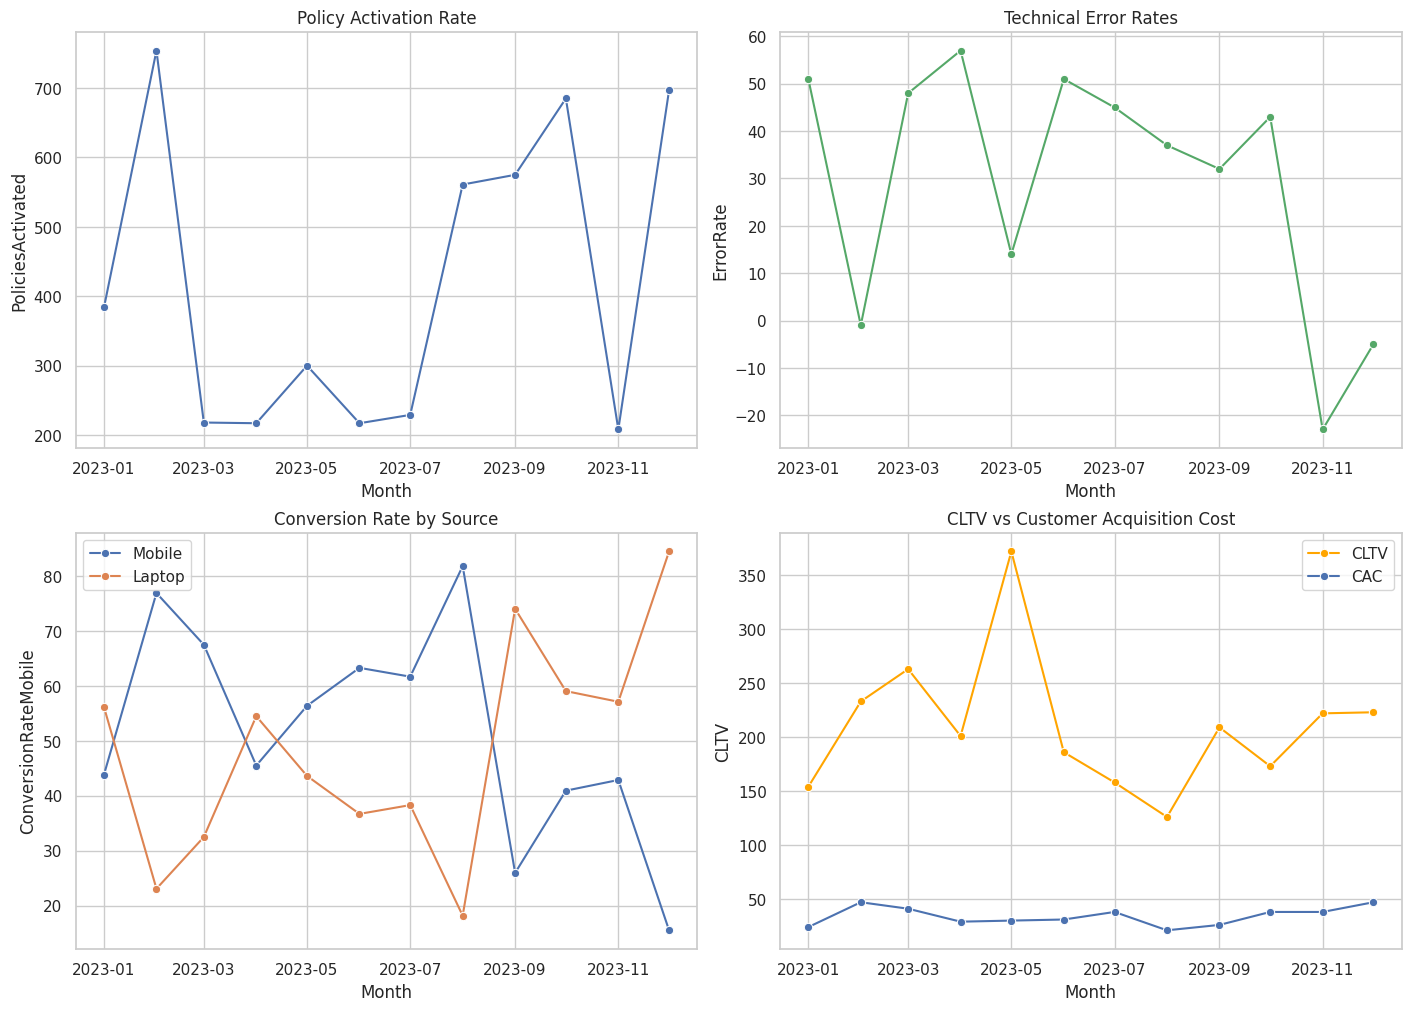

In [ ]:


# Define the date range for the mock data
months = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')

# Create the mock data for the Policies table
policies = pd.DataFrame({
    'Month': months,
    'PoliciesActivated': np.random.randint(200, 800, size=len(months))
})

# Create the mock data for the Technical Errors table
technical_errors = pd.DataFrame({
    'Month': months,
    'Errors': np.random.randint(10, 80, size=len(months)),
    'ResolvedErrors': np.random.randint(5, 40, size=len(months))
})

# Calculate the error rate as unresolved errors
technical_errors['ErrorRate'] = technical_errors['Errors'] - technical_errors['ResolvedErrors']

# Create the mock data for the Conversions table
conversions = pd.DataFrame({
    'Month': months,
    'ConversionsMobile': np.random.randint(100, 900, size=len(months)),
    'ConversionsLaptop': np.random.randint(100, 900, size=len(months))
})

# Create the mock data for Financial Metrics table
financial_metrics = pd.DataFrame({
    'Month': months,
    'CLTV': np.random.randint(100, 400, size=len(months)),
    'CAC': np.random.randint(20, 50, size=len(months))
})

# Calculate the conversion rate by source
conversions['ConversionRateMobile'] = conversions['ConversionsMobile'] / (conversions['ConversionsMobile'] + conversions['ConversionsLaptop']) * 100
conversions['ConversionRateLaptop'] = conversions['ConversionsLaptop'] / (conversions['ConversionsMobile'] + conversions['ConversionsLaptop']) * 100

# Plotting the KPIs
sns.set_theme(style="whitegrid")

fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Policy Activation Rate
sns.lineplot(ax=axs[0, 0], x='Month', y='PoliciesActivated', data=policies, marker='o')
axs[0, 0].set_title('Policy Activation Rate')

# Technical Error Rates
sns.lineplot(ax=axs[0, 1], x='Month', y='ErrorRate', data=technical_errors, marker='o', color='g')
axs[0, 1].set_title('Technical Error Rates')

# Conversion Rate by Source
sns.lineplot(ax=axs[1, 0], x='Month', y='ConversionRateMobile', data=conversions, marker='o', label='Mobile')
sns.lineplot(ax=axs[1, 0], x='Month', y='ConversionRateLaptop', data=conversions, marker='o', label='Laptop')
axs[1, 0].set_title('Conversion Rate by Source')
axs[1, 0].legend()

# CLTV vs CAC
sns.lineplot(ax=axs[1, 1], x='Month', y='CLTV', data=financial_metrics, marker='o', color='orange', label='CLTV')
sns.lineplot(ax=axs[1, 1], x='Month', y='CAC', data=financial_metrics, marker='o', color='b', label='CAC')
axs[1, 1].set_title('CLTV vs Customer Acquisition Cost')
axs[1, 1].legend()

plt.show()


# adding a new data in our table

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime

# Generate sample data
def generate_sample_data(num_records):
    np.random.seed(0)  # For reproducible results
    sensor_values = np.random.rand(num_records) * 100  # Random sensor values
    measurement_times = [datetime.now() + pd.Timedelta(hours=i) for i in range(num_records)]
    return sensor_values, measurement_times

# Create new data source table
def create_new_data_table(conn):
    conn.execute('''
        CREATE TABLE IF NOT EXISTS NewDataSource (
            DataID INTEGER PRIMARY KEY AUTOINCREMENT,
            SensorValue REAL NOT NULL,
            MeasurementTime TEXT NOT NULL
        );
    ''')
    conn.commit()

# Insert sample data into the new table
#********************* THIS COULD BE DONE BY A CONNECTOR BASED ON DATA SOURCE *****************
def insert_sample_data(conn, sensor_values, measurement_times):
    insert_stmt = 'INSERT INTO NewDataSource (SensorValue, MeasurementTime) VALUES (?, ?)'
    for sensor_value, measurement_time in zip(sensor_values, measurement_times):
        conn.execute(insert_stmt, (sensor_value, measurement_time.isoformat()))
    conn.commit()

# Main function to execute the script
def main():
    # Connect to the SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect('example.db')

    # Create a new table
    create_new_data_table(conn)

    # Generate sample data
    num_records = 5  # You can change this to the desired number of records
    sensor_values, measurement_times = generate_sample_data(num_records)

    # Insert sample data into the new table
    insert_sample_data(conn, sensor_values, measurement_times)

    # Fetch and print the inserted data to verify
    df = pd.read_sql_query('SELECT * FROM NewDataSource', conn)
    print(df)

    # Close the database connection
    conn.close()

# Execute the main function
if __name__ == '__main__':
    main()


   DataID  SensorValue             MeasurementTime
0       1    54.881350  2024-03-02T11:18:34.311811
1       2    71.518937  2024-03-02T12:18:34.311935
2       3    60.276338  2024-03-02T13:18:34.311957
3       4    54.488318  2024-03-02T14:18:34.311968
4       5    42.365480  2024-03-02T15:18:34.311977


# CODE 3 CORRECTION

In [ ]:
import psycopg2
from psycopg2 import extras

# Context managers are used for automatic connection/cursor closure.
with psycopg2.connect(user="simplesurance", password="simplesurance@#29",
                      host="127.0.0.1", port="5432", database="postgres_db") as connection:
    # Ensures transactional integrity (autocommit is False by default in context managers).
    with connection.cursor(cursor_factory=extras.DictCursor) as cursor:
        try:
            # Correct data type and query structure, Table Existence Check
            create_table_query = '''
            CREATE TABLE IF NOT EXISTS mobile (
                ID SERIAL PRIMARY KEY,  -- Using SERIAL for auto-incrementing IDs
                MODEL TEXT NOT NULL,
                PRICE NUMERIC,  -- Using NUMERIC for financial figures
                created_date TIMESTAMP DEFAULT CURRENT_TIMESTAMP  -- TIMESTAMP with DEFAULT
            );'''
            cursor.execute(create_table_query)
            # Commit the transaction
            connection.commit()
            print("Table created successfully.")
        except psycopg2.Error as e:
            print(f"An error occurred: {e}")
            connection.rollback()  # Roll back in case of error



> # Issue resolved
>
> everal potential failure points from the original:
>
> 1. **Resource Leaks**: The original code could fail to release database connections and cursors in case of exceptions, leading to resource leaks. The improved code uses context managers to ensure proper closure.
> 2. **Data Integrity**: Without transaction management, partial updates could occur on failure, leading to data inconsistencies. The improved version uses explicit transactions, allowing for rollbacks in case of errors.
> 3. **Error Handling**: The initial script lacked structured error handling, which could cause the program to crash on exceptions. The revised code includes try-except blocks for graceful error handling.
> 4. **Schema Conflicts**: Attempting to create a table that already exists without checking could cause errors. The **`IF NOT EXISTS`** clause prevents such conflicts.
> 5. **Data Type Precision**: The use of **`REAL`** for financial data could lead to precision loss. The improved script uses **`NUMERIC`** for precise financial calculations.
> 6. **Automatic Value Assignment**: The original **`ID`** field required manual entry, which could lead to errors or conflicts. The **`SERIAL`** type in the improved script automates ID assignment.
>
> Each change mitigates specific risks and improves the robustness and reliability of the database operation.
>